# Statistics about given data

In [9]:
#%pip install numpy

In [10]:
#%pip install matplotlib

In [11]:
#%pip install pandas

In [12]:
#%pip install scikit-learn

In [13]:
#%pip install keras

In [14]:
#%pip install tensorflow

In [15]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import pandas as pd

Data shape (977, 138)
X shape (977, 136)
y shape (977,)
There are 136 features
There are 7 uniques labels
Nombre d'instances de la classe anger : 149
Nombre d'instances de la classe disgust : 149
Nombre d'instances de la classe fear : 150
Nombre d'instances de la classe happy : 101
Nombre d'instances de la classe neutral : 130
Nombre d'instances de la classe sad : 149
Nombre d'instances de la classe surprise : 149


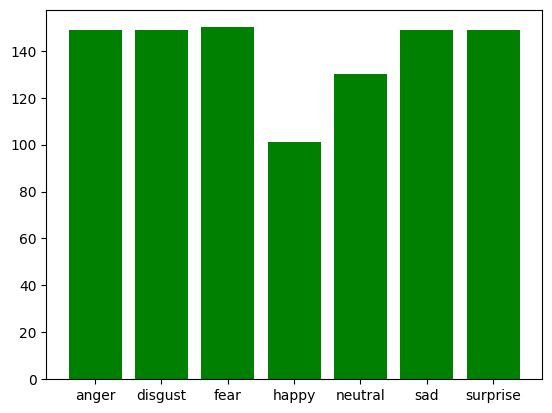

In [16]:
# Load CSV file
csv_path = "../project_data/training_set.csv"
data = pd.read_csv(csv_path).values

# Split data into features and labels
X = data[:, 2:]
y = data[:, 1]
image_names = data[:, 0]

# Inside X, there are landmarks coordinates, the first 67 columns are x coordinates, the last 67 columns are y coordinates
X_x = X[:, :68]
X_y = X[:, 68:]

# Print some stats
print("Data shape", data.shape)
print("X shape", X.shape)
print("y shape", y.shape)
print("There are {} features".format(X.shape[1]))
print("There are {} uniques labels".format(len(np.unique(y))))

# Plot histogram of labels
effectifs = {i:np.sum(y==i) for i in np.unique(y)}
for k,v in effectifs.items():
  print(f"Nombre d'instances de la classe {k} : {v}")

plt.bar(effectifs.keys(), effectifs.values(), color='g')
plt.show()

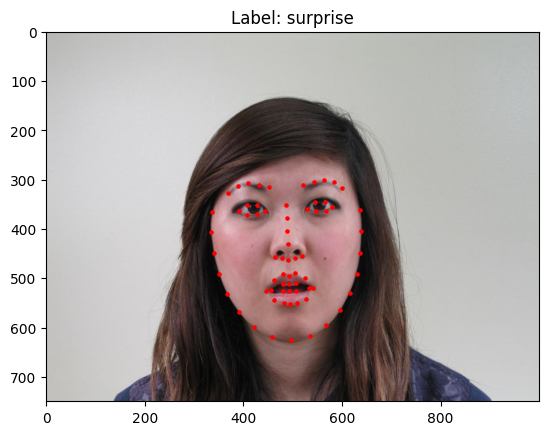

In [17]:
def plot_image(index):
    # Load image
    img = image.imread("../project_data/training_set/" + image_names[index])
    # Plot image
    plt.imshow(img)
    plt.title("Label: " + str(y[index]))
    # Draw landmarks
    for i in range(68):
        plt.scatter(X_x[index, i], X_y[index, i], c='r', s=5)

# Plot some images
plot_image(145)


3.5.0


c:\Users\rapha\Documents\ML_challenge\MLChallenge\venvMLChallenge\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        17,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,247 (102.53 KB)

 Trainable params: 26,247 (102.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1474 - loss: 179.0338 - val_accuracy: 0.1327 - val_loss: 48.6618
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1766 - loss: 32.0169 - val_accuracy: 0.0714 - val_loss: 18.0666
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1791 - loss: 27.1500 - val_accuracy: 0.1276 - val_loss: 23.3396
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1710 - loss: 29.9065 - val_accuracy: 0.1684 - val_loss: 30.7358
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1415 - loss: 35.8092 - val_accuracy: 0.2092 - val_loss: 22.6972
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1680 - loss: 22.6615 - val_accuracy: 0.1633 - val_loss: 16.8705
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2364 - loss: 21.4133 - val_accuracy: 0.1429 - val_loss: 43.2740
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1563 - loss: 36.2661 - val_ac

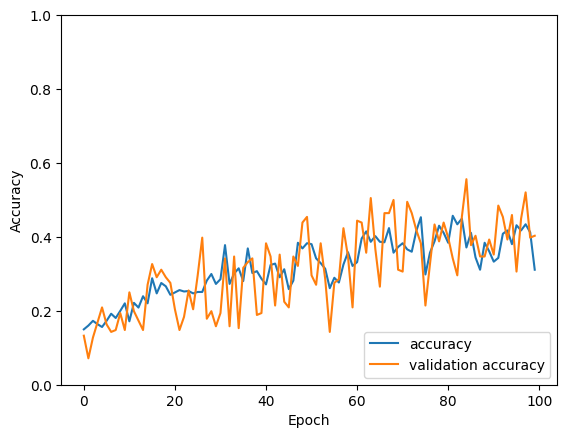

In [18]:
# Using sklearn to split data
from sklearn.model_selection import train_test_split
import keras
from keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print(keras.__version__)

emotion_to_number = {
    "neutral": 0,
    "happy": 1,
    "sad": 2,
    "anger": 3,
    "surprise": 4,
    "disgust": 5,
    "fear": 6
}

# Convert labels to numbers
y_int = np.array([emotion_to_number[label] for label in y])

# One-hot encode the labels
y_one_hot = utils.to_categorical(y_int, num_classes=7)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2)

# Make sure that the data is float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Create a simple model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


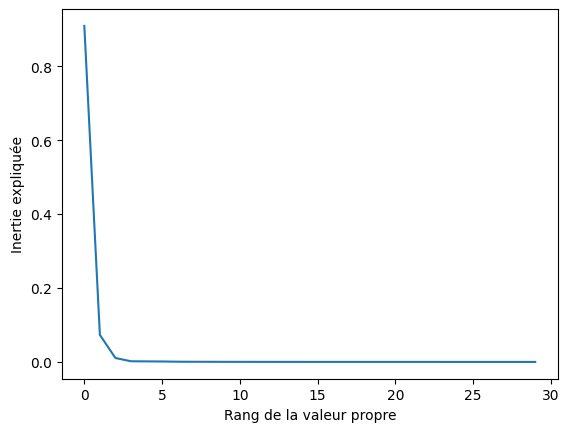

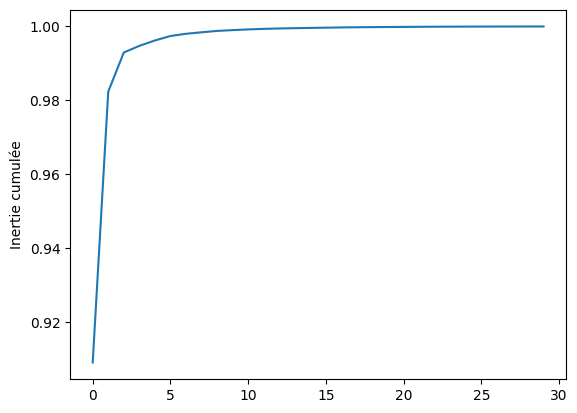

In [19]:
# Make a PCA on the data to reduce the number of features to 2
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit(X_train)

plt.plot([i for i in range(30)], pca.explained_variance_ratio_[:30])
plt.ylabel('Inertie expliquée')
plt.xlabel('Rang de la valeur propre')
plt.show()

plt.plot([i for i in range(30)], pca.explained_variance_ratio_.cumsum()[:30])
plt.ylabel('Inertie cumulée')
plt.xlabel('')
plt.show()

emotion_to_color = {
    "neutral": "r",
    "happy": "g",
    "sad": "b",
    "anger": "y",
    "surprise": "c",
    "disgust": "m",
    "fear": "k"
}

y_color = [emotion_to_color[i] for i in y]

## I'll try to use GridSearch

In [20]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\rapha\documents\ml_challenge\mlchallenge\venvmlchallenge\lib\site-packages (2.1.1)




[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Fitting 7 folds for each of 1 candidates, totalling 7 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=   6.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=   4.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=   5.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=   5.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=   4.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=   4.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, tree_method=hist; total time=   4.5s
Best param

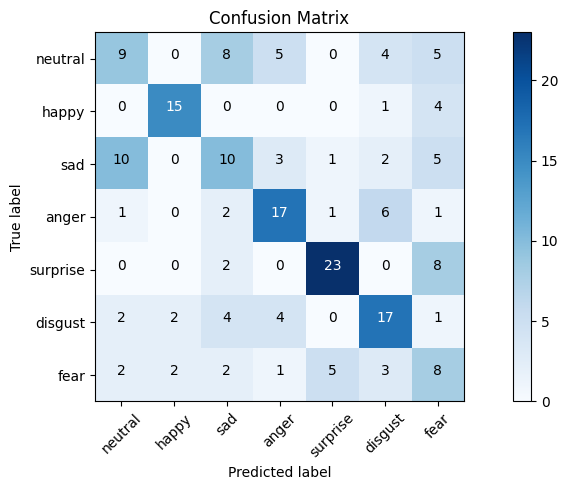

Classification Accuracy: 50.51%

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.29      0.33        31
           1       0.79      0.75      0.77        20
           2       0.36      0.32      0.34        31
           3       0.57      0.61      0.59        28
           4       0.77      0.70      0.73        33
           5       0.52      0.57      0.54        30
           6       0.25      0.35      0.29        23

    accuracy                           0.51       196
   macro avg       0.52      0.51      0.51       196
weighted avg       0.51      0.51      0.51       196



In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import itertools

# Load CSV file
csv_path = "../project_data/training_set.csv"
data = pd.read_csv(csv_path).values

# Split data into features and labels
X = data[:, 2:]
y = data[:, 1]
image_names = data[:, 0]

emotion_to_number = {
    "neutral": 0,
    "happy": 1,
    "sad": 2,
    "anger": 3,
    "surprise": 4,
    "disgust": 5,
    "fear": 6
}

# Convert labels to numbers
y_int = np.array([emotion_to_number[label] for label in y])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.2)

def tune_hyperparameters(X_train, y_train):
    param_grid = {
        'learning_rate': [0.1],
        'n_estimators': [200],
        'max_depth': [3],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'tree_method': ['hist'],
    }
    xgb = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', n_jobs=1, num_class=7)
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=7, n_jobs=1, verbose=2, scoring='accuracy', error_score='raise')
    grid_search.fit(X_train, y_train)
    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    return grid_search.best_estimator_

def evaluate_model(model, x_test, y_test):
    y_predict = model.predict(x_test)
    accuracy = accuracy_score(y_predict, y_test)
    report = classification_report(y_test, y_predict)
    matrix = confusion_matrix(y_test, y_predict)
    return accuracy, report, matrix

def plot_confusion_matrix(matrix, labels, title='Confusion Matrix'):
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], 'd'), horizontalalignment="center", color="white" if matrix[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def plot_metrics(matrix, labels, accuracy, report):
    plt.figure(figsize=(10,5))
    plot_confusion_matrix(matrix, labels)
    plt.show()
    print(f"Classification Accuracy: {accuracy*100:.2f}%")
    print("\nClassification Report:\n", report)

best_model = tune_hyperparameters(X_train, y_train)
accuracy, report, matrix = evaluate_model(best_model, X_test, y_test)
plot_metrics(matrix, list(emotion_to_number.keys()), accuracy, report)

# Using photos for CNN

## Step 1: spliting the images

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import csv
import random
import shutil
import pandas as pd

# Supprimer les dossiers existants
for dir in ['split/train/', 'split/validation/', 'split/test/']:
    if os.path.exists(dir):
        shutil.rmtree(dir)

base_path = "C:/Users/rapha/Documents/ML_challenge/project_data/"
images_path = os.path.join(base_path, "training_set")
csv_path = os.path.join(base_path, "training_set.csv")

total_img = len(os.listdir(images_path))
total_train = int(total_img * 0.8)
total_val = int(total_img * 0.1)
total_test = total_img - total_train - total_val

df = pd.read_csv(csv_path)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

for label in df['labels'].unique():
    os.makedirs(os.path.join('split/train', label), exist_ok=True)
    os.makedirs(os.path.join('split/validation', label), exist_ok=True)

os.makedirs('split/test', exist_ok=True)

# Compteurs pour suivre le nombre d'images dans chaque ensemble
train_count = 0
val_count = 0
test_count = 0

# Répartir les images
for i, (_, row) in enumerate(df.iterrows()):
    src = os.path.join(images_path, row['id'])
    
    if train_count < total_train:
        dst = os.path.join('split/train', row['labels'], row['id'])
        train_count += 1
    elif val_count < total_val:
        dst = os.path.join('split/validation', row['labels'], row['id'])
        val_count += 1
    else:
        dst = os.path.join('split/test', row['id'])
        test_count += 1
    
    # Copier l'image
    shutil.copy(src, dst)

print("total:", total_img)
print("train: ", train_count)
print("validation: ", val_count)
print("test: ", test_count)

total: 971
train:  776
validation:  97
test:  104


In [56]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

img_size = (int(750/5), int(1000/5))
batch_size = 32

train_data_gen = train_image_generator.flow_from_directory(
    'split/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_data_gen = validation_image_generator.flow_from_directory(
    'split/validation',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data_gen = test_image_generator.flow_from_directory(
    batch_size=batch_size,
    classes=['test'],
    directory='split/',
    target_size=img_size,
    class_mode="categorical",
    shuffle=False
)

Found 775 images belonging to 7 classes.
Found 97 images belonging to 7 classes.
Found 104 images belonging to 1 classes.


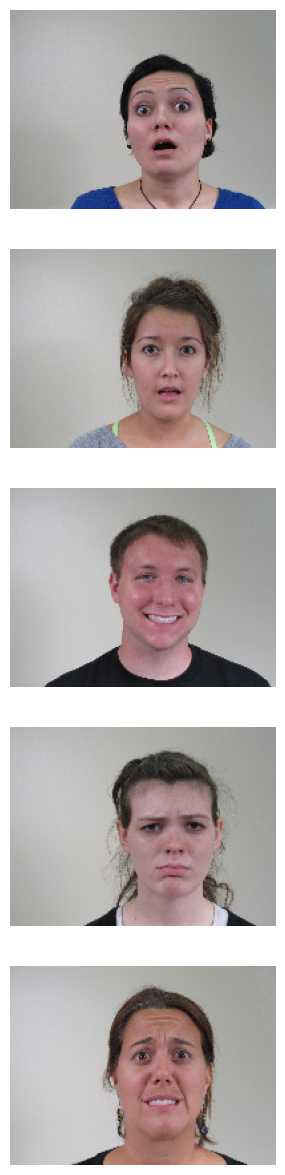

In [57]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [58]:
train_image_generator = ImageDataGenerator(
    rotation_range=70,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    vertical_flip=True
)

## Step 2: creating and training the model

In [62]:
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(int(750/5), int(1000/5), 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 148, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 74, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 74, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 72, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 36, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 36, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 110592)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │     7,077,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,097,799 (27.08 MB)

 Trainable params: 7,097,799 (27.08 MB)

 Non-trainable params: 0 (0.00 B)

## Step 3: testing the model

In [63]:
history = model.fit(x=train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    epochs=100,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size,
                    verbose=1
)



Epoch 1/100


c:\Users\rapha\Documents\ML_challenge\MLChallenge\venvMLChallenge\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 578ms/step - acc: 0.1260 - loss: 4.6754 - val_acc: 0.1562 - val_loss: 1.9454
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1562 - loss: 1.9479 - val_acc: 0.0000e+00 - val_loss: 1.9494
Epoch 3/100


C:\Users\rapha\miniconda3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 454ms/step - acc: 0.1407 - loss: 1.9457 - val_acc: 0.1354 - val_loss: 1.9447
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.1250 - loss: 1.9449 - val_acc: 0.0000e+00 - val_loss: 1.9508
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 457ms/step - acc: 0.1600 - loss: 1.9448 - val_acc: 0.1354 - val_loss: 1.9436
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.2188 - loss: 1.9425 - val_acc: 0.0000e+00 - val_loss: 1.9786
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 455ms/step - acc: 0.1625 - loss: 1.9439 - val_acc: 0.1354 - val_loss: 1.9432
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.1250 - loss: 1.9438 - val_acc: 0.0000e+00 - val_loss: 1.9561
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 452ms/step - acc: 0.1503 - loss: 1.9441 - val_acc: 0.1354 - val_loss: 1.9425
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.1875 - loss: 1.9495 - val_acc: 0.0000e+00 - val_loss: 1.9340
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 475

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

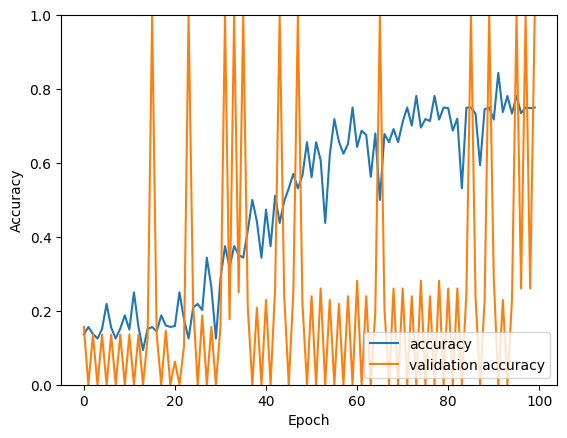

In [64]:
# Plot training history
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)